# (08) Rebuttal Fig -- Tiers (```GABAN```)

**Motivation**: <br>

In [1]:
# HIDE CODE


import os, sys
from IPython.display import display

# tmp & extras dir
git_dir = os.path.join(os.environ['HOME'], 'Dropbox/git')
extras_dir = os.path.join(git_dir, 'jb-Ca-fMRI/_extras')
fig_base_dir = os.path.join(git_dir, 'jb-Ca-fMRI/figs')
tmp_dir = os.path.join(git_dir, 'jb-Ca-fMRI/tmp')

# GitHub
sys.path.insert(0, os.path.join(tmp_dir, '_Ca-fMRI-Feb11'))
from figures.fighelper import *
from analysis.final import *
from utils.render import *

# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
from tqdm.notebook import tqdm
%matplotlib inline
set_style()

## Fig dir

In [2]:
nn = 512
fig_dir = pjoin(fig_base_dir, 'rebuttal')
os.makedirs(fig_dir, exist_ok=True)
print(fig_dir)

kws_fig = {
    'transparent': True,
    'bbox_inches': 'tight',
    'dpi': 300,
}

/home/hadi/Dropbox/git/jb-Ca-fMRI/figs/rebuttal

## Prepare (512)

In [3]:
mice = Mice(nn)

## Results (K = 7)

In [4]:
%%time

num_k = 7
mu_vals = [
    np.round(e / num_k, 3)
    for e in [0.5, 1, 1.75, 3.5]
]
results = member_results(
    mice=mice,
    num_k=num_k,
    use_prune=True,
    merge_thres=0.444,
    n_resamples=int(1e5),
    mu_vals=mu_vals,
)
bt = BootStrap(**results['props_ca'])
list(results)

CPU times: user 17.1 s, sys: 10.4 s, total: 27.5 s
Wall time: 26.8 s


[
    'bt_dict',
    'props_bo',
    'props_ca',
    'pi_sorted',
    'mu_vals',
    'members',
    'reject',
    'scores'
]

## Compute collapsed

In [5]:
collapsed = {
    k: np.zeros((4, len(bt.n2l)))
    for k in results['members']
}
for k, x in results['members'].items():
    vals = list(unique_idxs(x))
    for i, v in enumerate(vals):
        a = x.copy()
        a[a != v] = 0.0
        a = a.sum(0) > 0
        a = a.astype(float) * v
        collapsed[k][i] = a 

## Quantify fraction of pixels

In [6]:
from IPython.display import display, Latex
tiers = ['Orange', 'Yellow', 'Green', 'Purple']

top, _ = bt.load_top_flat()
top = top.astype(bool)

In [7]:
fractions = {}

for k, v in collapsed.items():
    x = bt.project_vec(v)['top'].astype(bool)
    x = np.sum(x, axis=(1, 2))
    x = x / top.sum()
    fractions[k] = x
    
    c = k.replace('\\!\\!', '')
    val = ', '.join([
        f"{tiers[i]}: {e:0.3f}"
        for i, e in enumerate(x)
    ])
    msg = ','.join([
        f"{c}",
        f"$\quad$ pixel ratio = [{val}]",
    ])
    display(Latex(msg))

In [8]:
fractions

{
    'BOLD': array([0.54922856, 0.46516059, 0.57840198, 0.26007941]),
    'Ca$^{2\\!\\!+}_{slow}$': array([0.45022782, 0.34417681, 0.47153834, 0.42353713]),
    'Ca$^{2\\!\\!+}_{fast}$': array([0.38255956, 0.38539816, 0.48558422, 0.28481839])
}

## Plot results

In [9]:
from figures.fig_mem import mk_member_cmap
spectral, accent = mk_member_cmap(acc=[1, 3, 5])

## Now do the collapse (new)

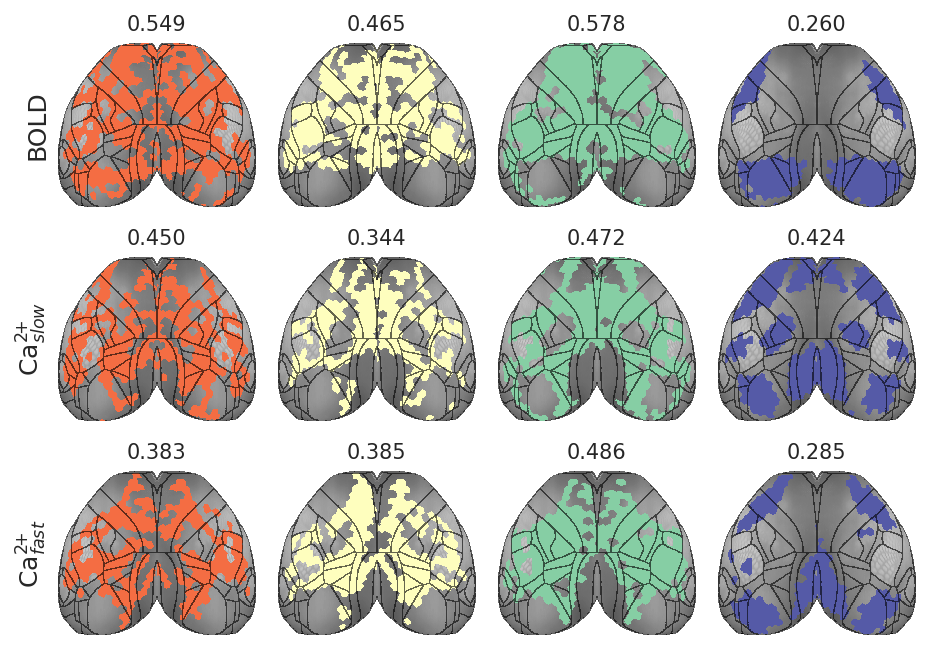

In [28]:
kws_show = {
    'vmin': 1,
    'vmax': len(results['mu_vals']),
    'interp': 'none',
    'cmap': spectral,
    'mask_thresh': 0.001,
    'contour_width': 0.2,
    'contour_alpha': 0.6,
    'contour_cmap': 'Greys_r',
    'contour_coarse': False,
    'add_disjoint': False,
    'add_title': False,
    'dpi': 150,
    'figsize_x': 2.1,
    'figsize_y': 1.5,
    'display': False,
    'constrained': True,
}
fig, axes = bt.show(collapsed, **kws_show)

for i, v_list in enumerate(fractions.values()):
    for j, v in enumerate(v_list):
        axes[i, j].set_title(f"{v:0.3f}", fontsize=10)

fig

In [29]:
kws_fig['transparent'] = False
fig.savefig(pjoin(fig_dir, 'Fig_Rebuttal_Tier.png'), **kws_fig)